In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [27]:
def lotka_volterra(y, t, alpha, beta, delta, gamma):
    x, y = y
    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    return [dxdt, dydt]

def lokta_volterra_noise(y, t, alpha, beta, delta, gamma):
    """
    This is the same as the lotka_volterra function, but with noise added to the parameters
    """
    x, y = y

    alpha_noise = np.random.normal(alpha, NOISE_STD)
    beta_noise = np.random.normal(beta, NOISE_STD)
    delta_noise = np.random.normal(delta, NOISE_STD)
    gamma_noise = np.random.normal(gamma, NOISE_STD)
    print(alpha_noise, beta_noise, delta_noise, gamma_noise)

    dxdt = alpha_noise * x - beta_noise * x * y
    dydt = delta_noise * x * y - gamma_noise * y
    return [dxdt, dydt]

def load_data():
    data = np.loadtxt("../observed_data/predator-prey-data.csv", delimiter=",")
    return data[:, 0], data[:, 1], data[:, 2]

def plot_model(t_data, x_data, y_data, sim_data):
    """
    Plot the observed data and the best fit
    """
    prey, predator = sim_data
    
    fig, axis = plt.subplots(1, 2, figsize=(12, 6))
    axis[0].plot(t_data, x_data, 'o')
    axis[0].plot(t_data, y_data, 'o')
    axis[0].set_title("Observed Data")

    axis[1].plot(t_data, prey, label='Prey')
    axis[1].plot(t_data, predator, label='Predator')
    axis[1].set_title("Lotka-Volterra Model")

    fig.suptitle(f"Lotka-Volterra Model\n given by $\\alpha = 0.57104693$, $\\beta = 0.47572982$, $\\delta = 0.93209038$, $\\gamma = 1.1220162$")
    fig.supxlabel("Time")
    fig.supylabel("Population")
    fig.legend()

    plt.tight_layout()
    plt.gcf().set_dpi(300)
    # plt.savefig("visualization/lotka_volterra.png")
    plt.show()

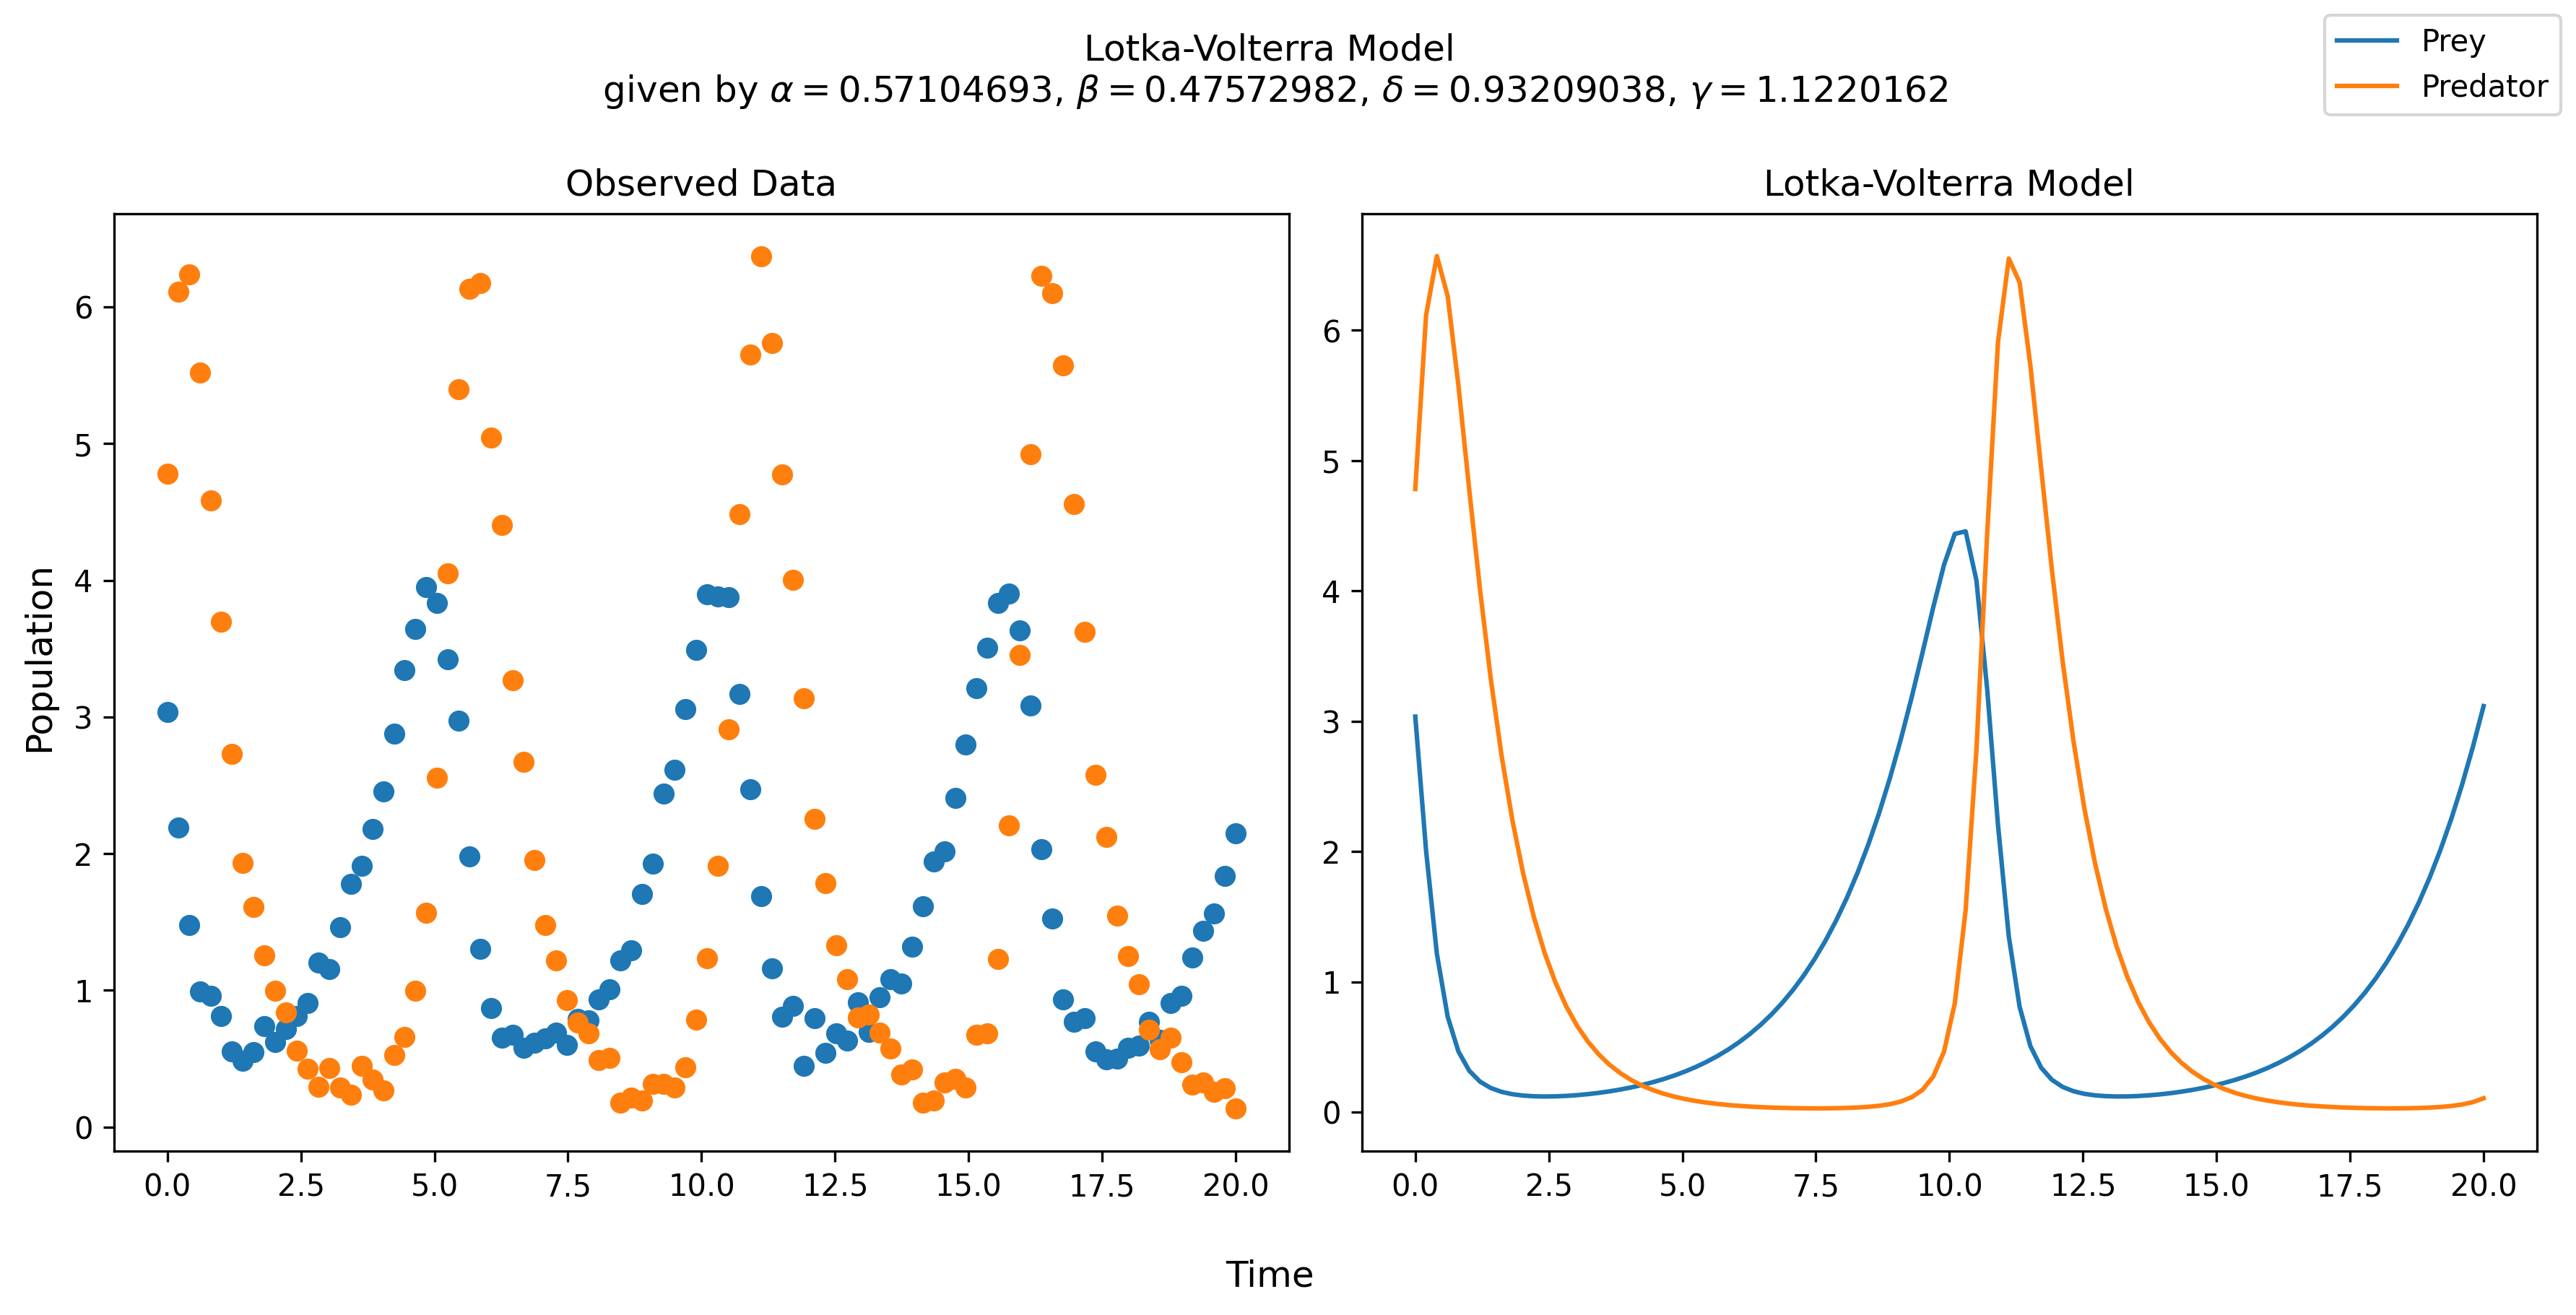

In [28]:
t_data, x_data, y_data = load_data()

y0 = [x_data[0], y_data[0]]
alpha, beta, delta, gamma = [0.57104693,0.47572982,0.93209038,1.1220162]

solution = odeint(lotka_volterra, y0, t_data, args=(alpha, beta, delta, gamma))
prey = solution[:, 0]
predator = solution[:, 1]

plot_model(t_data, x_data, y_data, [prey, predator])

0.5587354773992105 0.471722463652177 0.9180482306986111 1.1276933366641781
0.5873412903478601 0.4720222137817781 0.9084258769242913 1.1007623455409872
0.5759589447619772 0.4855801860605256 0.9045826264462247 1.1244624640269645
0.5744506170456483 0.46742076673645555 0.9178045885234863 1.1272318064356848
0.5951077752741072 0.4536842872708675 0.9202754045514261 1.1317239250063873
0.5816858856772837 0.4694547197570147 0.9393808024407562 1.1338064270325345
0.5732935768937937 0.4716297877102198 0.9378590828161384 1.131570251539923
0.5774694823972 0.49490362718993397 0.9118350865546269 1.1237257278093609
0.5730985532870289 0.45738113879217346 0.9314548421521036 1.121258539091117
0.5781292459663139 0.4895295630748343 0.9032817156731426 1.1247911210840555
0.5685630049747377 0.4921919051378561 0.9357168774710696 1.1098422041375693
0.5433971988537598 0.4821565112047278 0.9336149446710833 1.1247736255680503
0.5794109004416957 0.4759381094835232 0.9376099006854001 1.1060514788621054
0.5623762079630

/tmp/ipykernel_239965/1770215798.py:2: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  solution = odeint(lokta_volterra_noise, y0, t_data, args=(alpha, beta, delta, gamma))


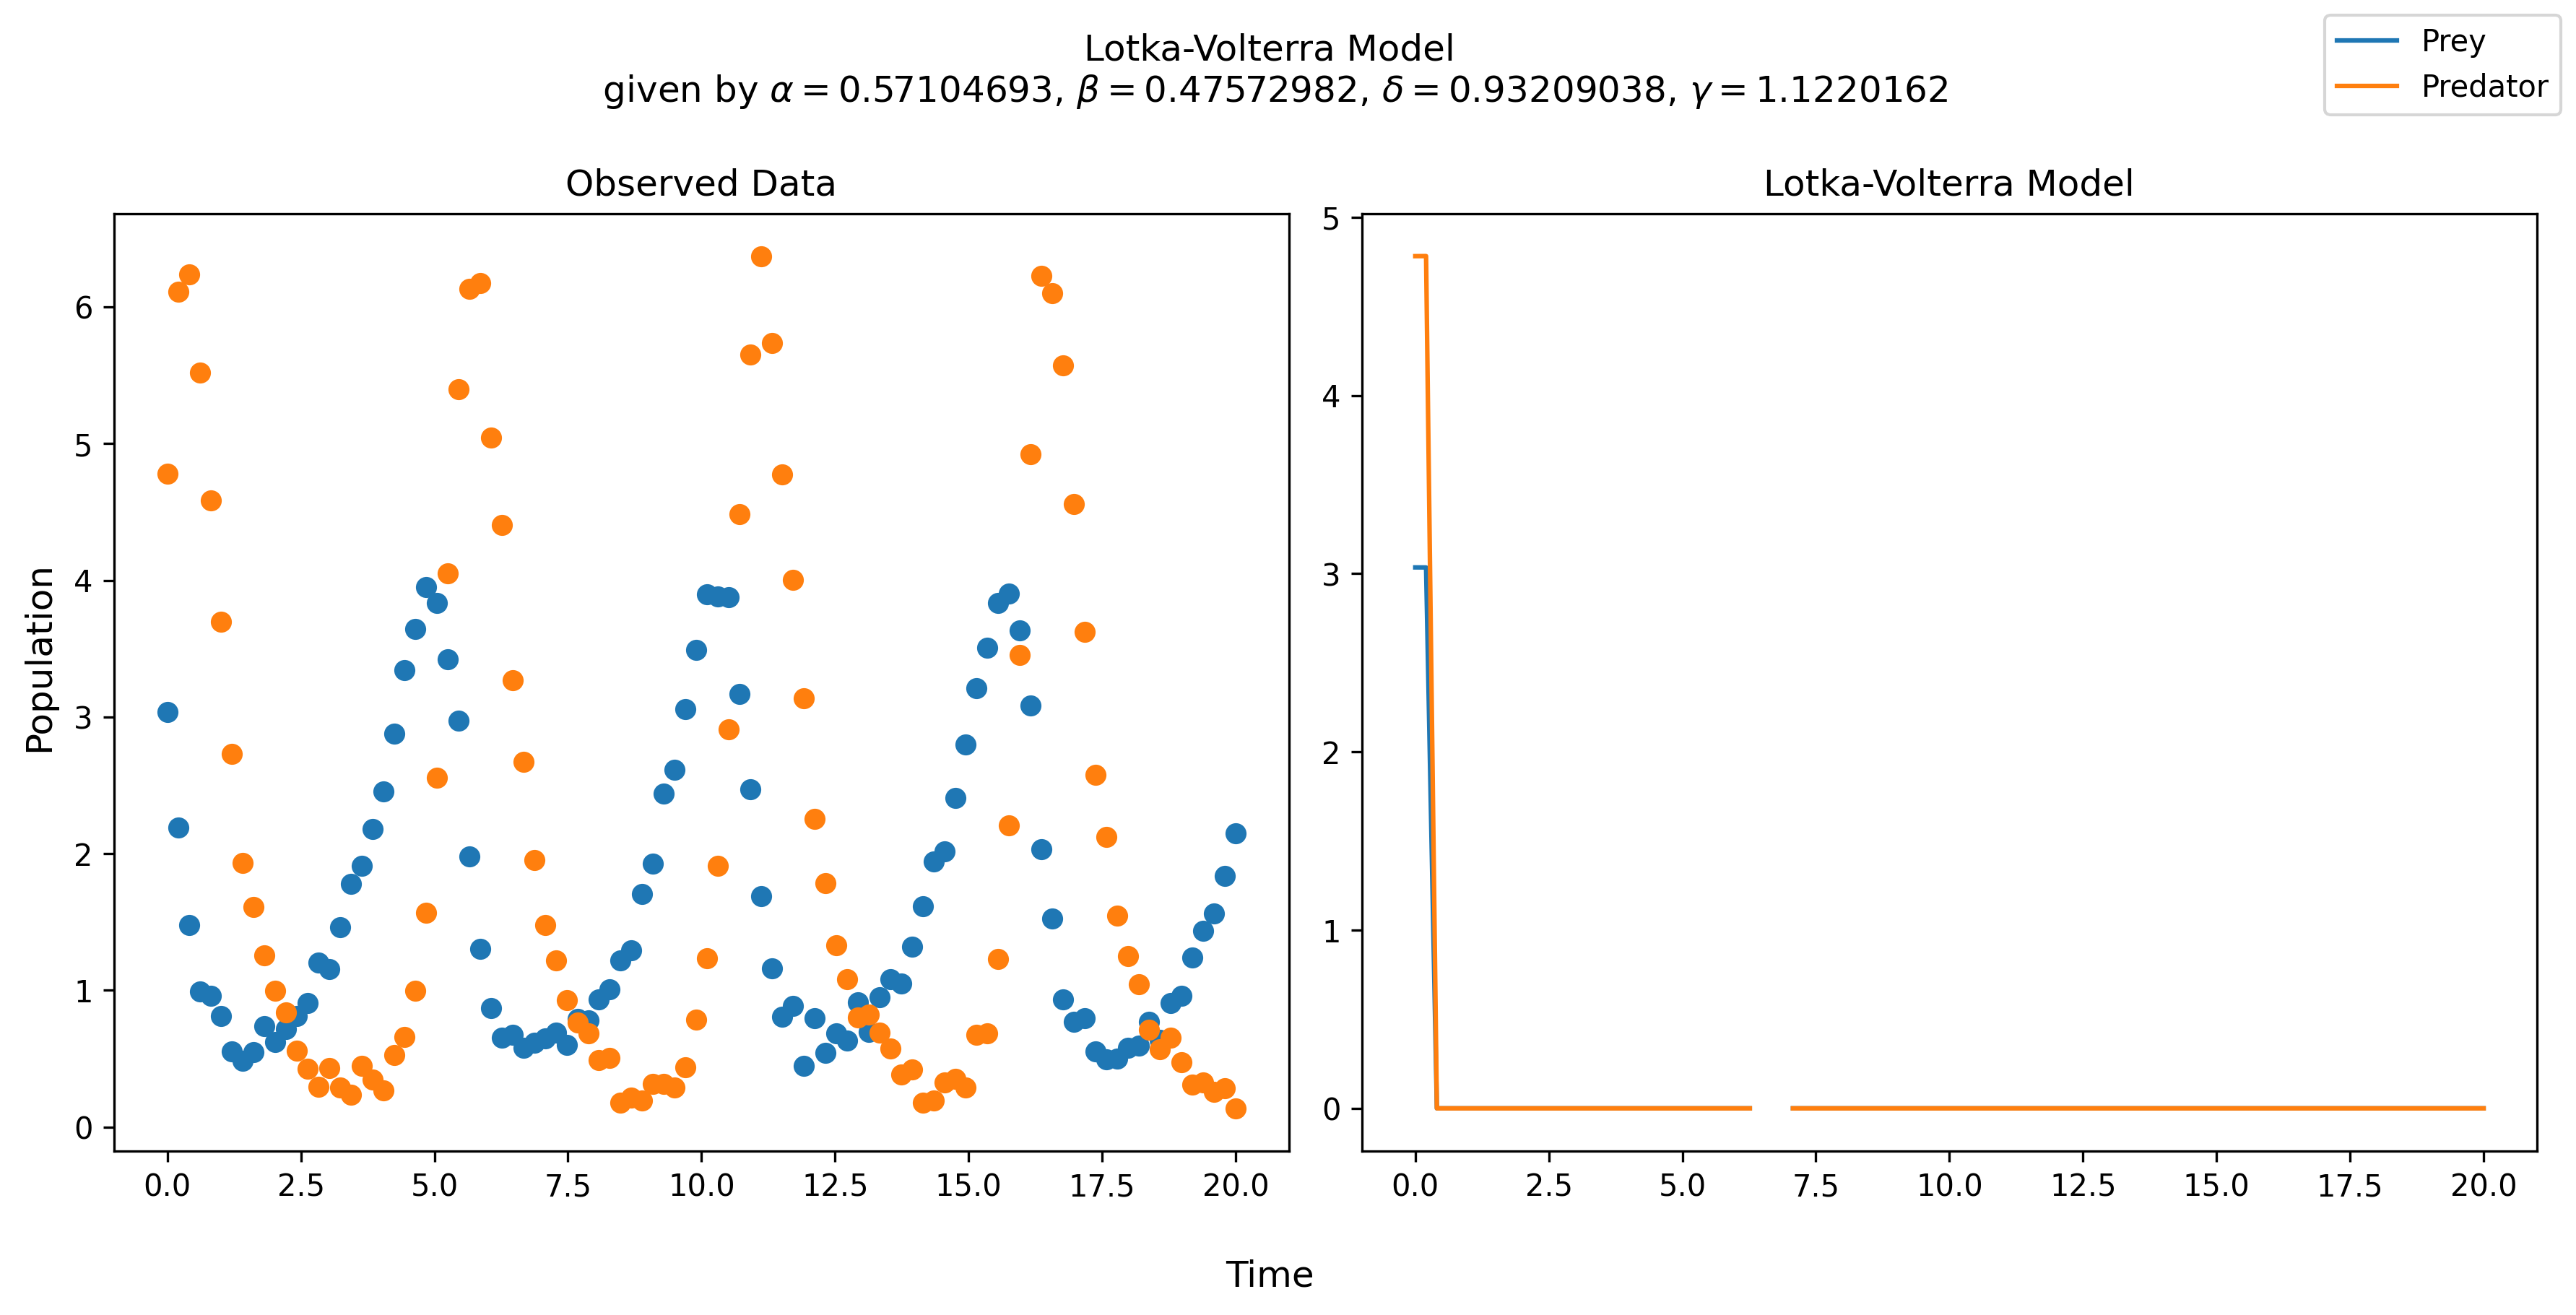

In [30]:
NOISE_STD = 0.01
solution = odeint(lokta_volterra_noise, y0, t_data, args=(alpha, beta, delta, gamma))
plot_model(t_data, x_data, y_data, [solution[:, 0], solution[:, 1]])